# Binned Data Notes

In [1]:
WS = '/home/ephelps/projects/phys-ana-omega'
WS_SETUP = '%s/python/oana_setup.py' % WS
%run $WS_SETUP

import itertools as it

import pylab as pl
from epfuncs import f_bwexpgaus
from epfuncs import f_bwexpgaus_pol4
from epfuncs import RejectWrapper
from epxsectutils import vgflux

from math import pi
mpi0, mpi, mrho0, mphi, mk, mw = 0.1349766, 0.139570, 0.77549, 1.019445, 0.493677, 0.78265
etarange = (0.5, 0.6)
omegarange = (mw-3*0.02, mw+3*0.02)
fitrange = (0.6, 0.95)
fbgskip = [etarange, omegarange]

/data/e1f/skim/3????.root
/data/e1f/skim/3xxxx_run.root
run.lum(=l)
runb.lb(=l)
tpipf.tpilf(=lf)
h10.tpipf(=pf)
h10.run(=r)
h10.tkin(=k)
elist_fid_mm_[123]=el[123]
loaded acc.cpp
loaded fid.cpp
loaded particle-constants.h
loaded Fid instance
loaded infid.C
loaded eff.cpp
recompiling h10t3pi_sel.C...
... done.
Fid::Instance() loaded	 from /home/ephelps/projects/phys-ana-omega/fid.cpp	 with parameters from /home/ephelps/analysis/omega/input/fid.parms
infid() loaded	 from /home/ephelps/projects/phys-ana-sandbox/sim/infid.C
h10 aliases: c, mpip, bifpip, dtifpip, sf	fidpass, fidpass[e,p,pip,pim]	top[1,2,3]pass, mmthreshpass, mmpi0pass	ccpass


In [2]:
c8 = r.TCanvas('c8','c8')

In [3]:
fin_t = ropen('/home/ephelps/projects/phys-ana-omega/input/acc-per-part.root')
#fin_e = ropen('/data/ephelps.bak/analysis/sandbox/out/h6-exp-varbin.root')
#fin_e = ropen('/data/ephelps.bak/analysis/sandbox/out/h6-top1-exp.root')
fin_e = ropen('/home/ephelps/projects/phys-ana-omega/h6maker-hn-el1.root')
# fin_e = ropen('/home/ephelps/projects/phys-ana-omega/h6maker-hn-el1_now8.root')
#fin_e = ropen('/home/ephelps/projects/phys-ana-omega/h6maker-hn-el1_himm.root')

In [4]:
h4_t, h4_a1, h4_a = fin_t.Get('hthrown'), fin_t.Get('hacc'), fin_t.Get('hacc0s')
h4_r = h4_t.Clone('h4_r')
h4_r.Multiply(h4_a1)
h6_e = fin_e.Get('hbd_yield')
dims = [0,1,3,4]
h4_e = h6_e.Projection(len(dims), array(dims,'i'))
import new
idims = new.module('idims_namespace')
idims.__dict__.update({'w': 0, 'q2': 1, 't': 2, 'p': 3})
print('  s   |  e  ')
for idim in [0, 1]:
    print('%.3f | %.3f' % (h4_t.GetAxis(idim).GetBinWidth(3), h4_t.GetAxis(idim).GetBinWidth(3)))
    

INFO:rootpy.logger] | No default log handler configured. See `logging` module |
INFO:rootpy.logger] \    To suppress: 'rootpy.log.basic_config_colorized()'   /


  s   |  e  
0.020 | 0.020
0.300 | 0.300


In [5]:
# yfmt = FormatStrFormatter('%.1e')
def draw_(hist, ncols=1, nrows=1, cell=1, fig=None):
    if fig is None:
        fig = plt.figure(figsize=(14, 5), dpi=100, facecolor='white')
    else:
        plt.figure(fig.number)
    subplot = fig.add_subplot(nrows, ncols, cell)
    subplot.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    if isinstance(hist, r.TH2):
        X, Y = np.meshgrid(list(hist.x()), list(hist.y()))
        x = X.ravel()
        y = Y.ravel()
        z = np.array(a.z()).T
        subplot.pcolormesh(X, Y, H)
    else:
        # locs,labels = yticks()
        # yticks(locs, map(lambda x: "%.1f" % x, locs*1e6))
        # text(0.0, 1.01, '1e-6', fontsize=10, transform = gca().transAxes)
        # subplot.yaxis.set_major_formatter(yfmt)
        rplt.errorbar([hist], xerr=False, emptybins=False)
    # plt.show()
    return fig

In [6]:
ht_w, ht_q2, ht_ct, ht_phi = [asrootpy(h4_t.Projection(idim)) for idim in range(0,4)]
hr_w, hr_q2, hr_ct, hr_phi = [asrootpy(h4_r.Projection(idim)) for idim in range(0,4)]
he_w, he_q2, he_ct, he_phi = [asrootpy(h4_e.Projection(idim)) for idim in range(0,4)]

In [7]:
ht_q2w, hr_q2w, he_q2w = [asrootpy(h4.Projection(idims.q2, idims.w)) for h4 in [h4_t, h4_r, h4_e]]

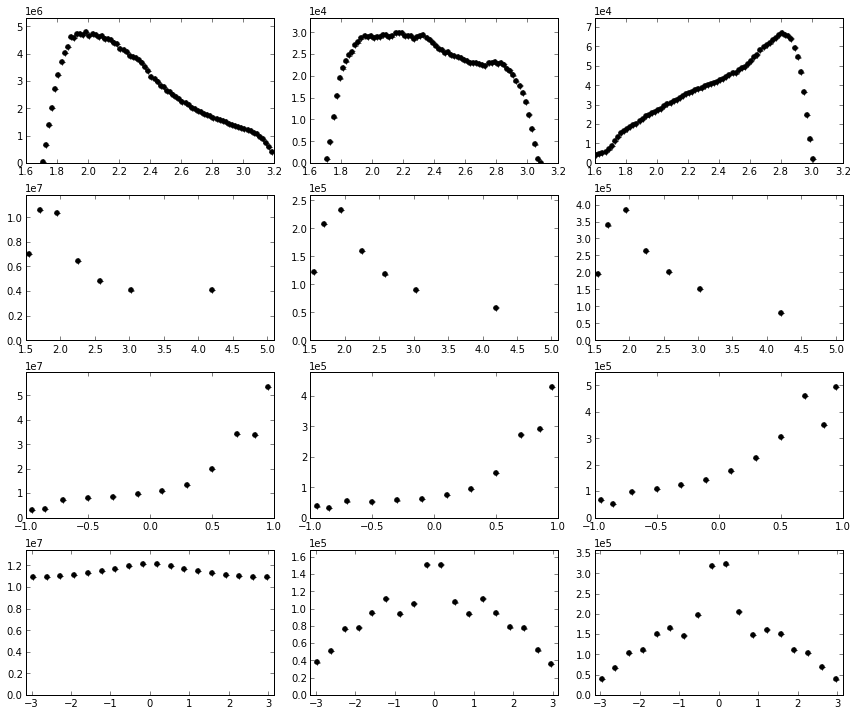

In [8]:
fig = plt.figure(figsize=(12, 10), dpi=100, facecolor='white')
hts = [ht_w, ht_q2, ht_ct, ht_phi]
hrs = [hr_w, hr_q2, hr_ct, hr_phi]
hes = [he_w, he_q2, he_ct, he_phi]
[draw(h1,3,4,i*3+j+1,fig) for i, h1s in enumerate(zip(hts, hrs, hes)) for j, h1 in enumerate(h1s)]
fig.tight_layout()
plt.show()

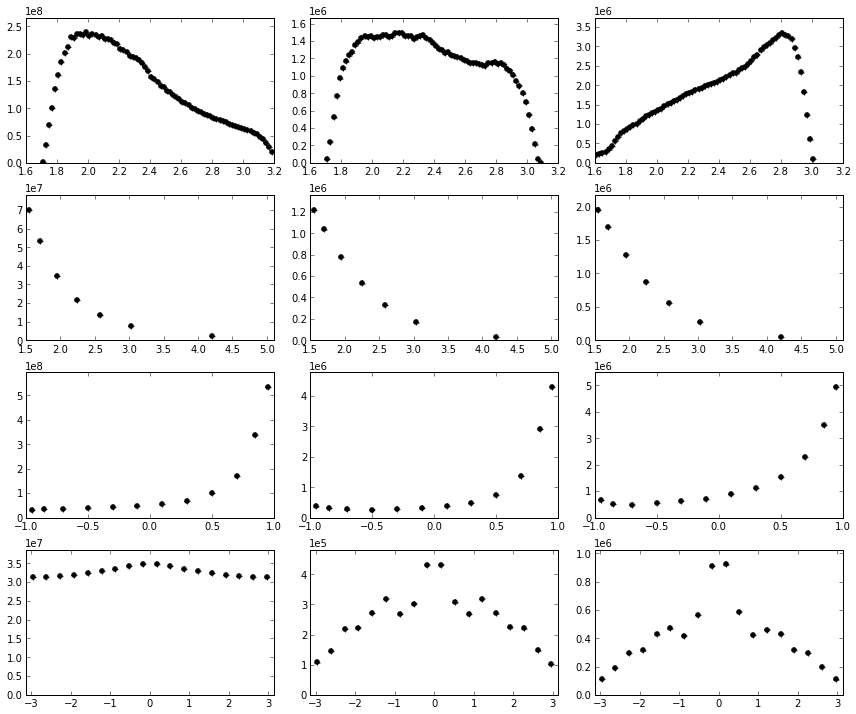

In [9]:
fig = plt.figure(figsize=(12, 10), dpi=100, facecolor='white')
hts = [ht_w, ht_q2, ht_ct, ht_phi]
hrs = [hr_w, hr_q2, hr_ct, hr_phi]
hes = [he_w, he_q2, he_ct, he_phi]
[h1.Scale(1,'width') for hs in [hts, hrs, hes] for h1 in hs]
[draw(h1,3,4,i*3+j+1,fig) for i, h1s in enumerate(zip(hts, hrs, hes)) for j, h1 in enumerate(h1s)]
fig.tight_layout()
plt.show()

In [10]:
def draw1(q2bin, wbin):
    fig = plt.figure(figsize=(12, 5), dpi=100, facecolor='white')
    h4s = [h4_t, h4_r, h4_e]
    for i, h4 in enumerate(h4s):
        h4.GetAxis(idims.w).SetRange(wbin,wbin)
        h4.GetAxis(idims.q2).SetRange(q2bin,q2bin)
        h1 = asrootpy(h4.Projection(idims.t))
        h1.Scale(1, 'width')
        draw(h1,3,2,i+1,fig)
        h1 = asrootpy(h4.Projection(idims.p))
        h1.Scale(1, 'width')
        draw(h1,3,2,i+4,fig)
        h4.GetAxis(idims.w).SetRange(0,-1)
        h4.GetAxis(idims.q2).SetRange(0,-1)
    fig.tight_layout()
    plt.show()

def fitbg(h, fstr='pol4'):
    # get function with fbgskip regions neglected in fit
    bgwrapper = RejectWrapper(r.TF1('fbg', fstr, 0.4, 1.2), fbgskip)
    fbgrej = bgwrapper.newtf1
    fbg = bgwrapper.tf1
    h.Fit(fbgrej, 'N0', '', *fitrange)
    return fbg

def drawf(f, fcolor='red', xs = pl.arange(0.6, 0.95, 0.001)):
    ys = pl.array([f.Eval(x) for x in xs])
    plot(xs, ys, linewidth=1.0, color=fcolor)

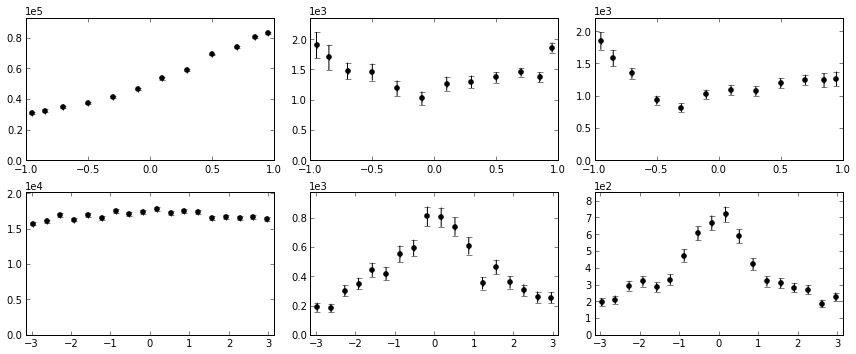

w_15: 1.880-1.900, 0.020
q2_5: 2.400-2.760, 0.360


In [11]:
draw1(5, 15)
# [draw1(3, wbin) for wbin in range(h4_e.GetAxis(idims.w).FindBin(1.9), h4_e.GetAxis(idims.w).FindBin(2.2))]
# [draw1(3, wbin) for wbin in [h4_e.GetAxis(idims.w).FindBin(1.9), h4_e.GetAxis(idims.w).FindBin(2.1), h4_e.GetAxis(idims.w).FindBin(2.3), h4_e.GetAxis(idims.w).FindBin(2.7)]]
wbin = h4_e.GetAxis(idims.w).FindBin(1.9)
wbl = h4_e.GetAxis(idims.w).GetBinLowEdge(wbin)
wbw = h4_e.GetAxis(idims.w).GetBinWidth(wbin)
wbh = wbl + wbw
print('w_%d: %.3f-%.3f, %.3f' % (wbin, wbl, wbh, wbw))
q2bin = 5
q2bl = h4_e.GetAxis(idims.q2).GetBinLowEdge(q2bin)
q2bw = h4_e.GetAxis(idims.q2).GetBinWidth(q2bin)
q2bh = q2bl + q2bw
print('q2_%d: %.3f-%.3f, %.3f' % (q2bin, q2bl, q2bh, q2bw))


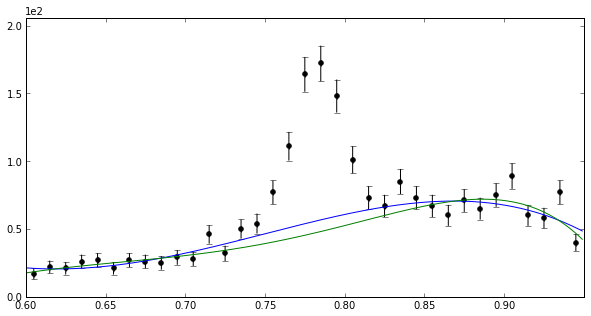

In [12]:
h6_e.GetAxis(idims.w).SetRange(15,15)
h6_e.GetAxis(idims.q2).SetRange(5,5)
he_mmp = asrootpy(h6_e.Projection(5))
fbg4 = fitbg(he_mmp, 'pol4')
fig = draw(he_mmp)
drawf(fbg4, 'blue')
fbg8 = fitbg(he_mmp, 'pol8')
drawf(fbg8, 'green')

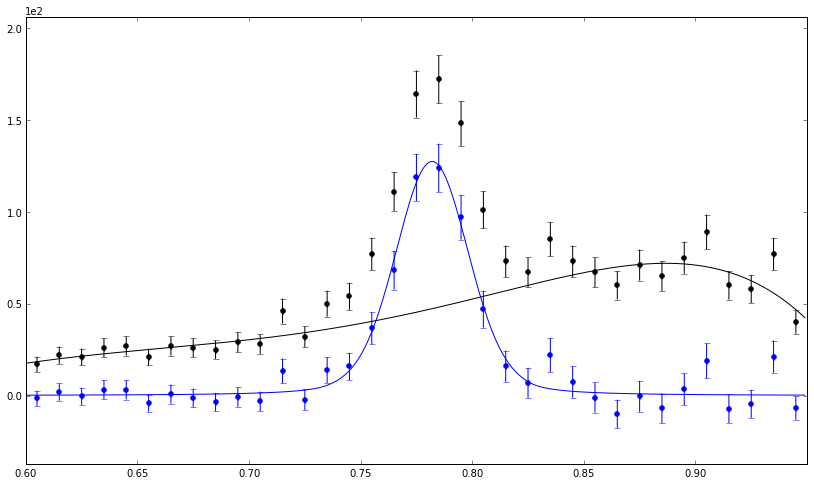

In [13]:
fig = plt.figure(figsize=(14, 8), dpi=100, facecolor='white')
fig = draw(he_mmp, fig=fig)
drawf(fbg8, 'black')
hsig = asrootpy(he_mmp.Clone('hsig'))
hsig.Add(fbg8,-1)
fsig = f_bwexpgaus(limsmass=(mw-0.003,mw+0.005), limsmag=(1,200), limssigma=(0.01, 0.03), limsehl=(0.0005,0.01))
hsig.Fit(fsig, 'N0', '') #, *omegarange)
hsig.SetColor('blue')
fig = draw(hsig, 1, 1, 1, fig)
drawf(fsig, 'blue')

In [14]:
print('bg skip: '+2*'(%.3f,%.3f) ' % tuple([fbgskip[i][j] for i in range(0,2) for j in range(0,2)]))
wsigma = fsig.GetParameter(2)
wmean = fsig.GetParameter(1)
siglo, sighi = wmean-3*wsigma, wmean+3*wsigma
print('signal 3-sigma region: (%.3f,%.3f)' % (siglo,sighi))
for ipar in range(0,fsig.GetNpar()):
    print(fsig.GetParameter(ipar))
m, s = fsig.Mean(siglo, sighi), sqrt(fsig.Variance(siglo, sighi))
print(m,s)
# print('skewness: %.3f' % (m/s)**3)
print('func skewness: %.3f' % fsig.Moment(3,siglo,sighi))
hsig.GetXaxis().SetRangeUser(mw-5*wsigma,mw+5*wsigma)
print('hist skewness: %.3f (%.3f, %.3f)' % (hsig.GetSkewness(),mw-5*wsigma,mw+5*wsigma))
hsig.GetXaxis().SetRangeUser(mw-3*wsigma,mw+3*wsigma)
print('hist skewness: %.3f (%.3f, %.3f)' % (hsig.GetSkewness(),mw-3*wsigma,mw+3*wsigma))
hsig.GetXaxis().SetRangeUser(mw-2*wsigma,mw+2*wsigma)
print('hist skewness: %.3f (%.3f, %.3f)' % (hsig.GetSkewness(),mw-2*wsigma,mw+2*wsigma))
hsig.GetXaxis().SetRangeUser(mw-1.5*wsigma,mw+1.5*wsigma)
print('hist skewness: %.3f (%.3f, %.3f)' % (hsig.GetSkewness(),mw-1.5*wsigma,mw+1.5*wsigma))

bg skip: (0.500,0.600) (0.723,0.843) 
signal 3-sigma region: (0.738,0.825)
5.73887670795
0.781293844838
0.0144101645128
0.000500002018179
(0.7819137233399635, 0.016534746023721621)
func skewness: 0.479
hist skewness: -0.066 (0.711, 0.855)
hist skewness: -0.240 (0.739, 0.826)
hist skewness: 0.056 (0.754, 0.811)
hist skewness: 0.114 (0.761, 0.804)


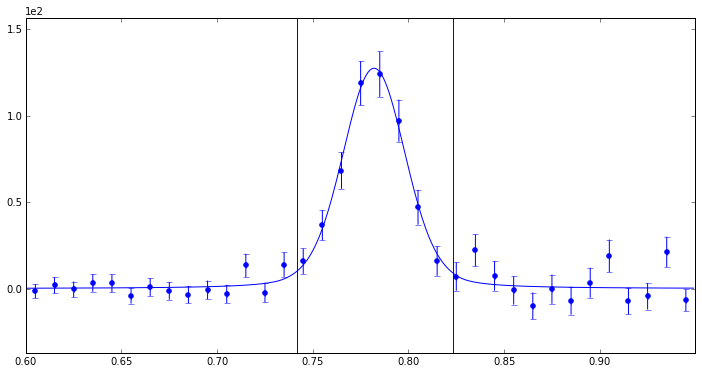

In [15]:
def d_voigt(v, par):
    return par[0]*r.TMath.Voigt(v[0]-par[1], par[2], par[3]);

fvoigt = r.TF1('fvoigt', d_voigt, 0.6, 0.95, 4)
fvoigt.SetParameters(85, 0.78265, 0.017, 0.0849)
#fvoigt.FixParameter(1,mw)
#fvoigt.FixParameter(3,0.00849)
fvoigt.SetParLimits(1,mw-0.00060,mw+0.00060)
fvoigt.SetParLimits(3,0.00849-0.00040,0.00849+0.00040)
hsig.Fit(fvoigt, 'LLN0', '')
hsig.SetColor('blue')
fig = plt.figure(figsize=(12, 6), dpi=100, facecolor='white')
fig = draw(hsig, fig=fig)
drawf(fsig, 'blue')
m = fvoigt.GetParameter(1)
s = fvoigt.GetParameter(2)
lo, hi = m-3*s, m+3*s
axvline(lo)
axvline(hi)

In [16]:
intFull = fvoigt.Integral(0.6, 0.95)
int3s = fvoigt.Integral(lo,hi)
print(int3s)
print(int3s/intFull)

5.16501752644
0.932334585797


In [17]:
lobin, hibin = he_mmp.FindBin(lo), he_mmp.FindBin(hi)
lo, hi = he_mmp.GetBinLowEdge(lobin), he_mmp.GetBinLowEdge(hibin+1)

In [18]:
print(he_mmp.Integral(1,lobin-1,'width'),fbg8.Integral(0.6,lo))
print(he_mmp.Integral(hibin+1,he_mmp.GetNbinsX(),'width'),fbg8.Integral(hi,0.95))

(3.97, 3.7745368068031997)
(8.2, 7.830623014080833)


In [19]:
sbw = fbg8.Integral(lo, hi)/(he_mmp.Integral(1,lobin-1,'width')+he_mmp.Integral(hibin+1,he_mmp.GetNbinsX(),'width'))
print(sbw)

0.358925688934


In [20]:
import rootplot
import rootplot.root2matplotlib as r2m

def draw(hist, ncols=1, nrows=1, cell=1, fig=None, figsize=(10, 5)):
    if fig is None:
        fig = plt.figure(figsize=figsize, dpi=100, facecolor='white')
    else:
        plt.figure(fig.number)
    subplot = fig.add_subplot(nrows, ncols, cell)
    subplot.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    if isinstance(hist, r.TH2):
        # rplt.hist2d(hist, axes=subplot)
        r2m.Hist2D(hist).colz()
    else:
        rplt.errorbar([hist], xerr=False, emptybins=False)
    # plt.show()
    return fig

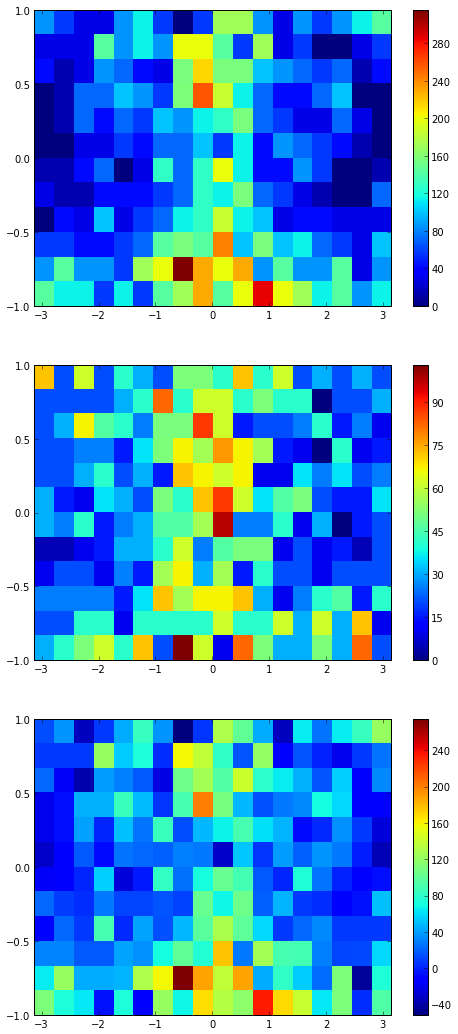

In [21]:
h6_e.GetAxis(idims.w).SetRange(15,15)
h6_e.GetAxis(idims.q2).SetRange(5,5)

h6_e.GetAxis(5).SetRange(1,lobin-1)
h2sb1 = h6_e.Projection(3, 4)
h6_e.GetAxis(5).SetRange(hibin+1,he_mmp.GetNbinsX())
h2sb2 = h6_e.Projection(3, 4)
h2sb = h2sb1.Clone('h2sb')
h2sb.Add(h2sb2)
h2sb.Scale(sbw)
h6_e.GetAxis(5).SetRange(lobin,hibin)
h2sig = h6_e.Projection(3, 4)
h2sig_bgs = h2sig.Clone('h2sig_bgs')
h2sig_bgs.Add(h2sb, -1)
[h2.Scale(1, 'width') for h2 in [h2sb1, h2sb2, h2sb, h2sig, h2sig_bgs]]

fig = plt.figure(figsize=(8, 18), dpi=100, facecolor='white')
for i, h2 in enumerate([h2sig, h2sb, h2sig_bgs]):
    h2.SetMinimum(0)
    fig = draw(asrootpy(h2), 1, 3, i+1, fig=fig)

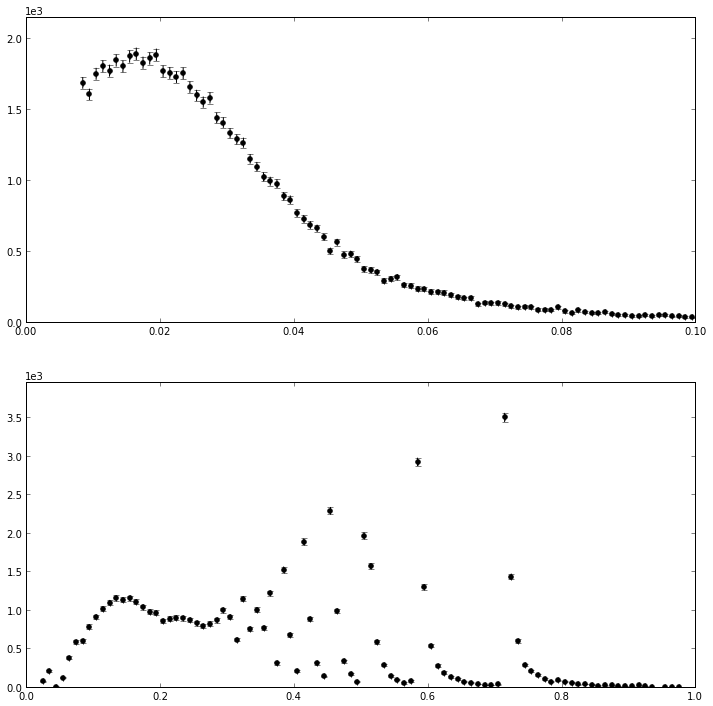

In [22]:
haccdist0s = Hist(100, 0, 0.1)
herrdist0s = Hist(100, 0, 1)
for ibin in range(0,h4_a.GetNbins()):
    bc = h4_a.GetBinContent(ibin)
    if bc == 0:
        h4_a.SetBinError(ibin, 0)
    else:
        haccdist0s.Fill(bc)
        herrdist0s.Fill(h4_a.GetBinError(ibin)/bc)

fig = draw(haccdist0s, 1, 2, 1, figsize=(12, 12))
fig = draw(herrdist0s, 1, 2, 2, fig)

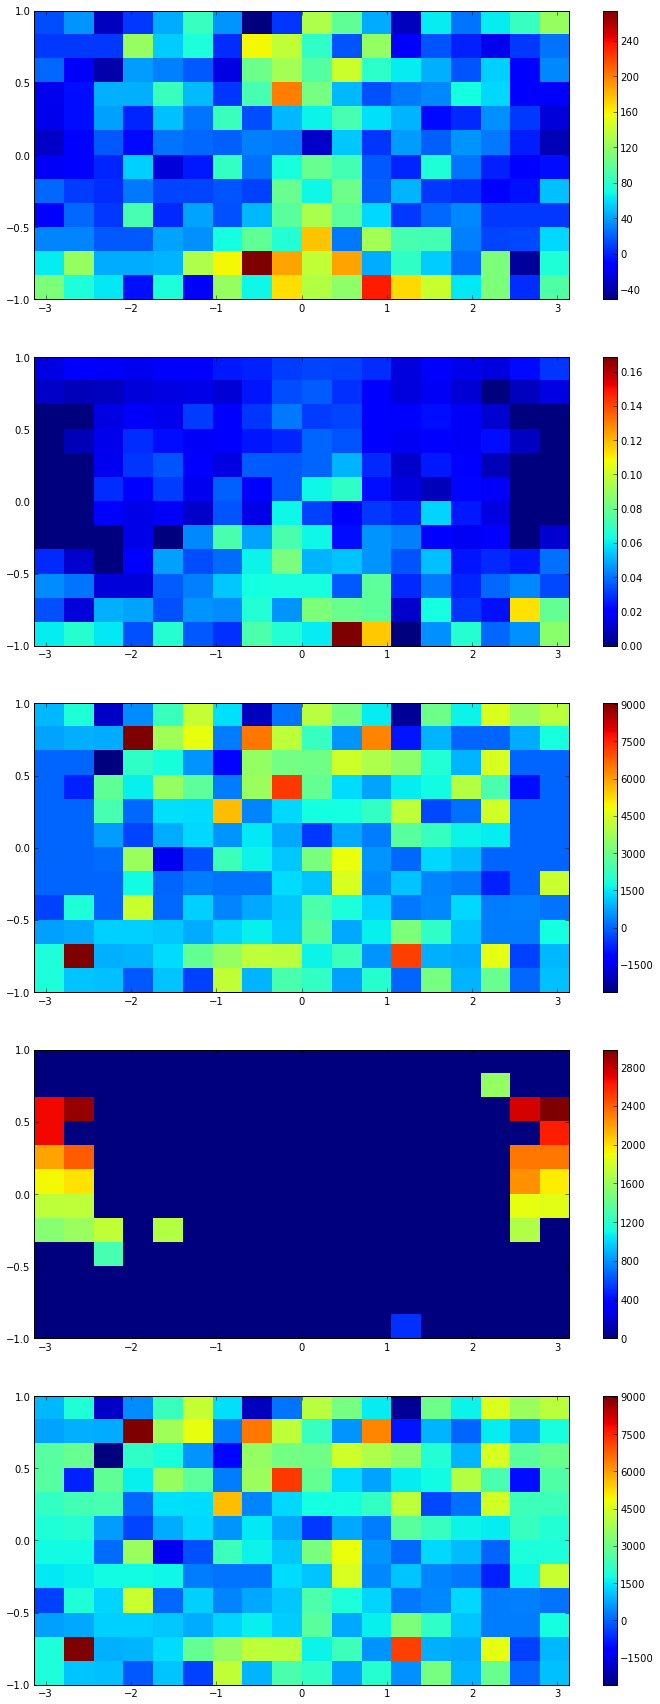

In [23]:
h4_t.GetAxis(idims.w).SetRange(15, 15)
h4_t.GetAxis(idims.q2).SetRange(5, 5)
h2t = h4_t.Projection(idims.t, idims.p)
h4_r.GetAxis(idims.w).SetRange(15, 15)
h4_r.GetAxis(idims.q2).SetRange(5, 5)
h2r = h4_r.Projection(idims.t, idims.p)
h4_a.GetAxis(idims.w).SetRange(15, 15)
h4_a.GetAxis(idims.q2).SetRange(5, 5)
h2a = h4_a.Projection(idims.t, idims.p)
scale = h2sig_bgs.Integral()/h2r.Integral()
h2r_acor = h2r.Clone('h2r_acor')
h2r_acor.Divide(h2a)
h2t.Add(h2r_acor,-1)
h2t.Scale(scale)
h2sig_bgs_acor = h2sig_bgs.Clone('h2sig_bgs_acor')
h2sig_bgs_acor.Divide(h2a)
h0filled = h2sig_bgs_acor.Clone('h0filled')
h0filled.Add(h2t)
fig = plt.figure(figsize=(12, 30), dpi=100, facecolor='white')
for i, h2 in enumerate([h2sig_bgs, h2a, h2sig_bgs_acor, h2t, h0filled]):
    h2.SetMinimum(0)
    fig = draw(asrootpy(h2), 1, 5, i+1, fig=fig)

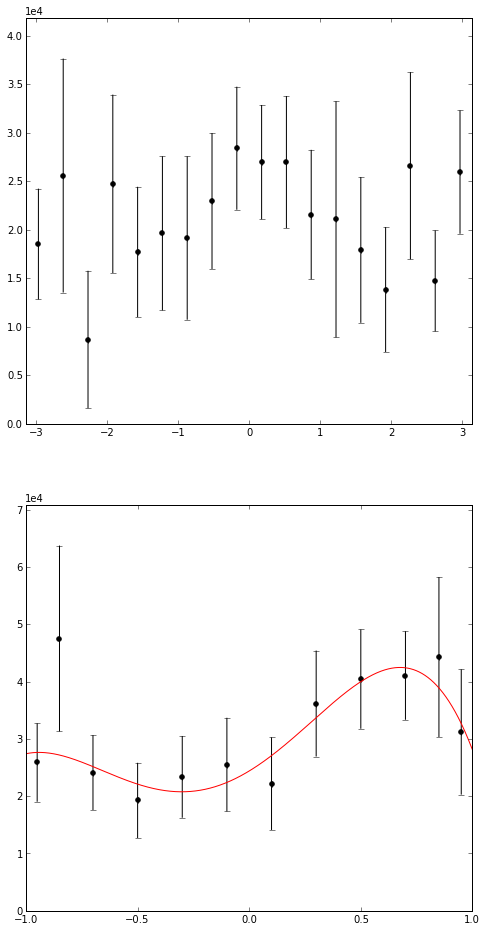

In [24]:
gSystem.Load('libMathMore.so')

lms = [(0,0), (1,0), (2,0), (3,0), (4,0), (5,0)]
# lms = [(1,0), (1,1), (2,0), (2,1), (2,2)]

def d_legs(v, par):
    return reduce(lambda x,y: x+y, [par[i]*r.Math.assoc_legendre(l,m,v[0]) for i,(l,m) in enumerate(lms)])

hcost = h0filled.ProjectionY()
hphi = h0filled.ProjectionX()
flegs = r.TF1('l0to4', d_legs,-1,1, len(lms))
hcost.Fit(flegs, 'N0')
fig = draw(asrootpy(hphi), 1, 2, 1, figsize=(8,16))
fig = draw(asrootpy(hcost), 1, 2, 2, fig)
drawf(flegs, xs = pl.arange(-1, 1, 0.001))

In [25]:
wlo, whi = h4_e.GetAxis(idims.w).GetBinLowEdge(15), h4_e.GetAxis(idims.w).GetBinLowEdge(16)
qlo, qhi = h4_e.GetAxis(idims.q2).GetBinLowEdge(5), h4_e.GetAxis(idims.q2).GetBinLowEdge(6)
print('W  = [%.3f, %.3f)' % (wlo,whi))
print('Q2 = [%.3f, %.3f)' % (qlo,qhi))

W  = [1.880, 1.900)
Q2 = [2.400, 2.760)


In [26]:
h10.SetEntryList(el1)
h10.Draw('Q2:W>>hq2w(160,1.6,3.2,50,0.5,5.5)','','goff')

2598008L

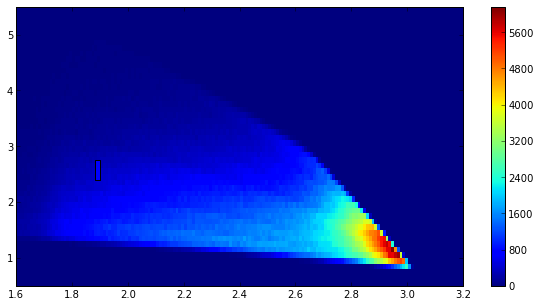

In [40]:
hq2w = gROOT.FindObject('hq2w')
fig = draw(hq2w)
rect = plt.Rectangle((1.88, 2.4), .02, .36)
plt.gca().add_patch(rect)
from matplotlib.transforms import Bbox
bbox = Bbox.from_bounds(1.88, 2.4, .02, .36)
plt.show()